In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
train_df = pd.read_csv("../data/train_imputed.csv")

In [3]:
train_df.shape

(614, 13)

In [4]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Semiurban,Urban,Loan_Status
0,LP001002,1.0,0.0,0.0,1.0,0.0,132.2,360.0,1.0,5849.0,0.0,1.0,1
1,LP001003,1.0,1.0,1.0,1.0,0.0,128.0,360.0,1.0,6091.0,0.0,0.0,0
2,LP001005,1.0,1.0,0.0,1.0,1.0,66.0,360.0,1.0,3000.0,0.0,1.0,1
3,LP001006,1.0,1.0,0.0,0.0,0.0,120.0,360.0,1.0,4941.0,0.0,1.0,1
4,LP001008,1.0,0.0,0.0,1.0,0.0,141.0,360.0,1.0,6000.0,0.0,1.0,1


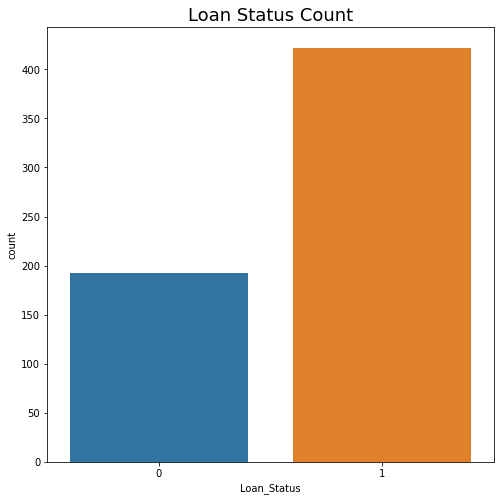

In [5]:
plt.figure(figsize=(8,8))
plt.title("Loan Status Count", fontdict={'fontsize':18})
sb.countplot(x=train_df['Loan_Status'])
plt.show()

In [6]:
percent_loan_status = round(100*train_df["Loan_Status"].value_counts()/len(train_df), 2)
print(f"Percentage of People with Loan Status as 1: {percent_loan_status[1]}\n\
Percentage of People with Loan Status as 0: {percent_loan_status[0]}")

Percentage of People with Loan Status as 1: 68.73
Percentage of People with Loan Status as 0: 31.27


In [7]:
X = train_df.drop(['Loan_ID', "Loan_Status"], axis=1)
y = train_df["Loan_Status"]

## Using Smote

In [8]:
from imblearn.combine import SMOTETomek
import time

In [9]:
combine_sampler = SMOTETomek(random_state=42, n_jobs=-1)

In [10]:
a= time.time()
X_sampled, y_sampled = combine_sampler.fit_resample(X,y)
print(f"Time taken: {(time.time()-a)/60} minutes.")

Time taken: 0.0012944300969441732 minutes.


In [11]:
y_sampled

0      1
1      0
2      1
3      1
4      1
      ..
687    0
688    0
689    0
690    0
691    0
Name: Loan_Status, Length: 692, dtype: int64

In [12]:
train_sampled = pd.concat([X_sampled, y_sampled], axis=1)
train_sampled.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Semiurban,Urban,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,132.2,360.0,1.0,5849.0,0.0,1.0,1
1,1.0,1.0,1.0,1.0,0.0,128.0,360.0,1.0,6091.0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,1.0,66.0,360.0,1.0,3000.0,0.0,1.0,1
3,1.0,1.0,0.0,0.0,0.0,120.0,360.0,1.0,4941.0,0.0,1.0,1
4,1.0,0.0,0.0,1.0,0.0,141.0,360.0,1.0,6000.0,0.0,1.0,1


In [13]:
train_sampled.shape

(692, 12)

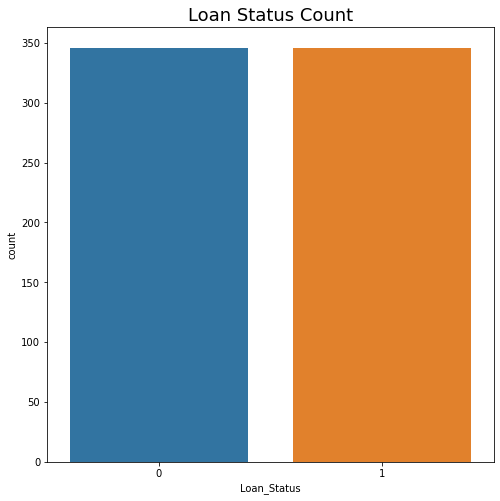

In [14]:
plt.figure(figsize=(8,8))
plt.title("Loan Status Count", fontdict={'fontsize':18})
sb.countplot(x=y_sampled)
plt.show()

In [15]:
percent_loan_status = round(100*y_sampled.value_counts()/len(y_sampled), 2)
print(f"Percentage of People with Loan Status as 1: {percent_loan_status[1]}\n\
Percentage of People with Loan Status as 0: {percent_loan_status[0]}")

Percentage of People with Loan Status as 1: 50.0
Percentage of People with Loan Status as 0: 50.0


In [16]:
#saving the re-sampeled data
train_sampled.to_csv("../data/train_resampled.csv", index=False)